In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import os

In [2]:
#About the dataset http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
df = pd.read_csv(os.path.join("Hollywood Attractiveness Attributes.csv"))
df.head()

,Image,Arched_Eyebrows,Bags_Under_Eyes,Big_Lips,Big_Nose,Chubby,Double_Chin,High_Cheekbones,Oval_Face,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Young,Attractive
0,000001.jpg,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,1
1,000002.jpg,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,1,0
2,000003.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,0
3,000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,1
4,000005.jpg,1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,1


In [3]:
positiveFeatures = ["Young", "Arched_Eyebrows", "Pointy_Nose", "Oval_Face", "Rosy_Cheeks", "High_Cheekbones"]
Xp = df[positiveFeatures]
yp = df.Attractive

negativeFeatures = ["Big_Nose", "Chubby", "Double_Chin", "Receding_Hairline", "Bags_Under_Eyes", "Sideburns"]
Xn = df[negativeFeatures]
yn = df.Attractive

In [4]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.4, random_state=1, stratify = yp)
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.4, random_state=1, stratify = yn)

In [5]:
positiveClassifier = DecisionTreeClassifier()
negativeClassifier = DecisionTreeClassifier()

# Train Decision Tree Classifer
positiveClassifier = positiveClassifier.fit(Xp_train,yp_train)
negativeClassifier = negativeClassifier.fit(Xn_train,yn_train)

#Predict the response for test dataset
yp_pred = positiveClassifier.predict(Xp_test)
yn_pred = negativeClassifier.predict(Xn_test)
# print(yp_pred)
# print(yn_pred)

In [6]:
print(f'Positively Correlated Features Training Score: {positiveClassifier.score(Xp_train, yp_train)}')
print(f'Positively Correlated Features Testing Score: {positiveClassifier.score(Xp_test, yp_test)}')
print(" ")
print(f'Negatively Correlated Features Training Score: {negativeClassifier.score(Xn_train, yn_train)}')
print(f'Negatively Correlated Features Testing Score: {negativeClassifier.score(Xn_test, yn_test)}')

# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Positively Correlated Features Training Score: 0.7126251449913211
Positively Correlated Features Testing Score: 0.7099210266535044
 
Negatively Correlated Features Training Score: 0.6542090672019348
Negatively Correlated Features Testing Score: 0.6515918065153011


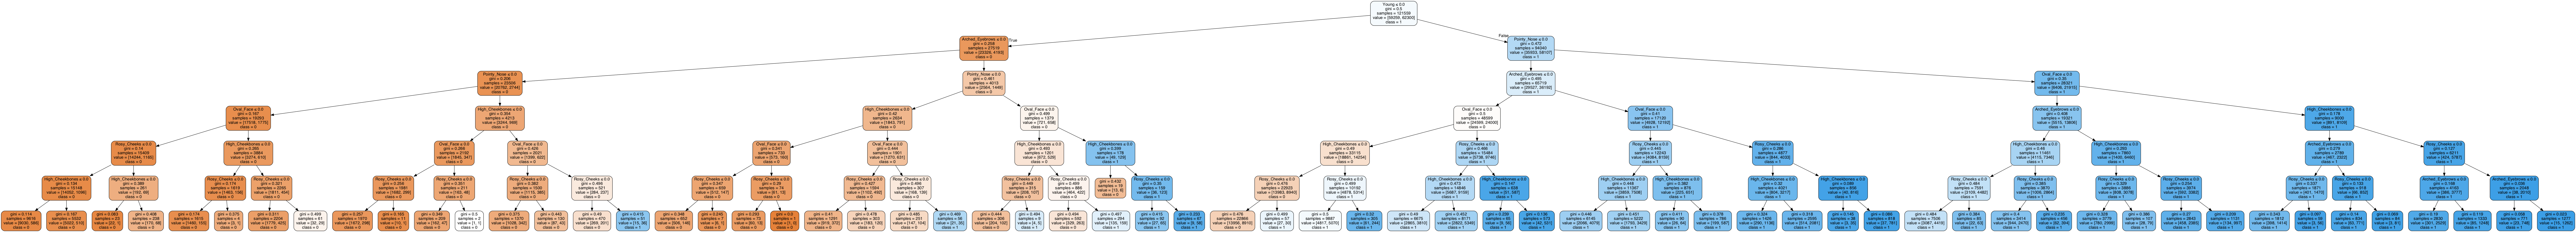

In [7]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
#https://www.youtube.com/watch?v=LDRbO9a6XPU
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(positiveClassifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = positiveFeatures,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Positively Correlated Attractiveness Tree.png')
Image(graph.create_png())

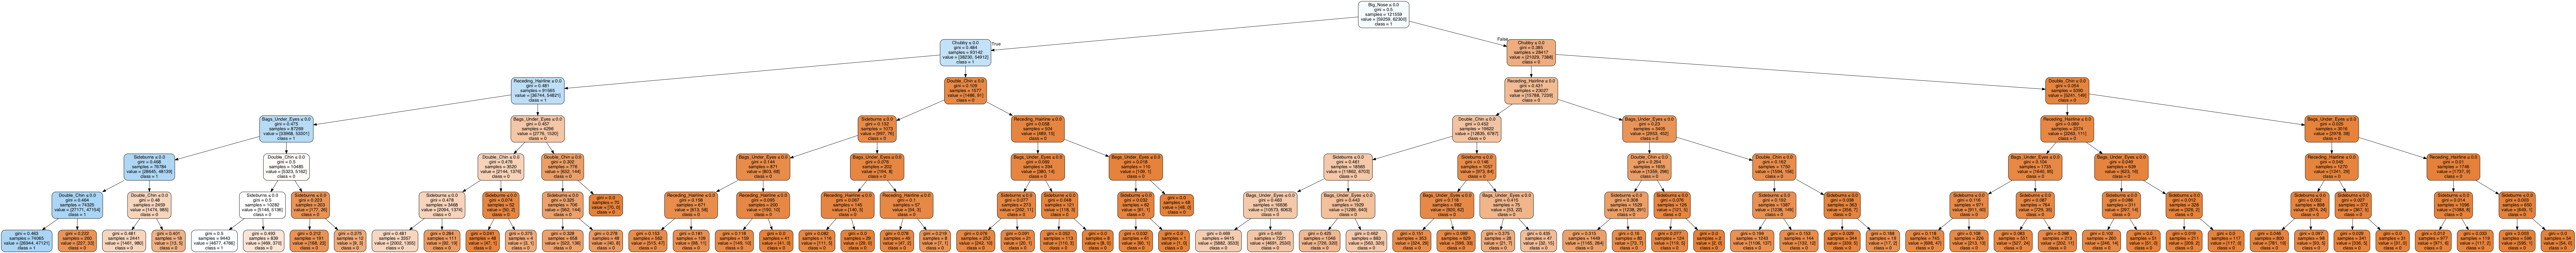

In [8]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(negativeClassifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = negativeFeatures,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Negatively Correlated Attractiveness Tree.png')
Image(graph.create_png())